In [4]:
import cv2
import dicom
from matplotlib import pyplot as plt
import numpy as np
from scipy.misc import imresize

%matplotlib inline

In [3]:
plt.set_cmap("gray")

In [168]:
IMAGE_SIZE = 64

In [169]:
img_1 = \
cv2.equalizeHist(
    imresize(
        dicom.read_file("/home/a.kondyukov/data/Indianapolis_dicom/1/1_IM-0001-4001.dcm").pixel_array, 
        [IMAGE_SIZE, IMAGE_SIZE]
    )
)

img_2 = \
cv2.equalizeHist(
    imresize(
        dicom.read_file("/home/a.kondyukov/data/Indianapolis_dicom/2/2_IM-0652-1001.dcm").pixel_array,
        [IMAGE_SIZE, IMAGE_SIZE]
    )
)

In [170]:
%%time

sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()

kp1, des1 = sift.detectAndCompute(img_1, None)
kp2, des2 = sift.detectAndCompute(img_2, None)

# kp1, des1 = surf.detectAndCompute(img_1, None)
# kp2, des2 = surf.detectAndCompute(img_2, None)

CPU times: user 8.99 ms, sys: 0 ns, total: 8.99 ms
Wall time: 7.6 ms


In [171]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, 10)
# matches = sorted(matches, key = lambda x: x.distance)

# Apply ratio test
good = []
for ms in matches:
    if ms[0].distance < .9 * ms[1].distance:
        good.append([ms[0]])

img3 = cv2.drawMatchesKnn(img_1, kp1, img_2, kp2, good[:10], flags=2, outImg=img_2)

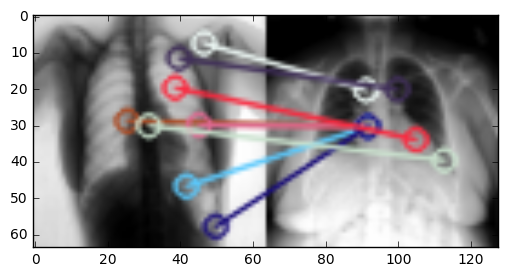

In [172]:
plt.imshow(img3)

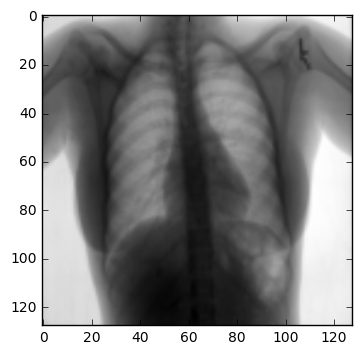

In [20]:
plt.imshow(tmp_img)